In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
x=np.load(r'C:\zach\archive\Biomed_Data_x.npy')
x_test=np.load(r'C:\zach\archive\Biomed_Data_x_test.npy')
x=x/x.max()
x_test=x_test/x_test.max()
y=np.load(r'C:\zach\archive\Biomed_Data_y.npy')
y_test=np.load(r'C:\zach\archive\Biomed_Data_y_test.npy')

In [3]:
#loading 3 models and compairing the results
best_model=tf.keras.models.load_model(r'C:\zach\archive\latest_model_dense16_dropout50') #dense layer16 50% dropout
best_model2=tf.keras.models.load_model(r'C:\zach\archive\latest_model_dense16') #dense layer16 10% dropout
best_model3=tf.keras.models.load_model(r'C:\zach\archive\latest_model_dense16_dropout50_32') #dense layer16 50% dropout after 
                                                                                             #the second training

In [9]:
val_loss, val_acc =best_model.evaluate(x_test, y_test)
print('Validation loss is {}%'.format(np.round(100*val_loss,3)))
print('Validation accuracy is {}%'.format(np.round(100*val_acc,3)))

3/3 [==============================] - 0s 38ms/step - loss: 0.2987 - accuracy: 0.8667
Validation loss is 29.869%
Validation accuracy is 86.667%


In [10]:
val_loss, val_acc =best_model2.evaluate(x_test, y_test)
print('Validation loss is {}%'.format(np.round(100*val_loss,3)))
print('Validation accuracy is {}%'.format(np.round(100*val_acc,3)))

3/3 [==============================] - 0s 40ms/step - loss: 0.7573 - accuracy: 0.8000
Validation loss is 75.732%
Validation accuracy is 80.0%


In [11]:
val_loss, val_acc =best_model3.evaluate(x_test, y_test)
print('Validation loss is {}%'.format(np.round(100*val_loss,3)))
print('Validation accuracy is {}%'.format(np.round(100*val_acc,3)))

3/3 [==============================] - 0s 37ms/step - loss: 0.2090 - accuracy: 0.9333
Validation loss is 20.901%
Validation accuracy is 93.333%


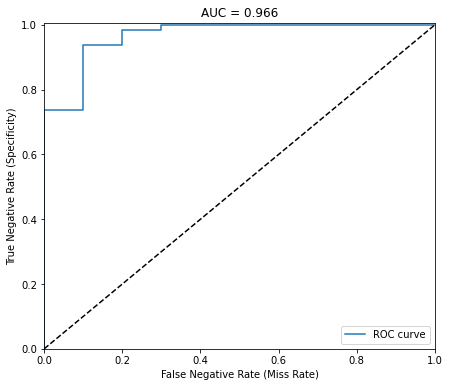

In [14]:
predictions =best_model3.predict(x_test)
fpr, tpr, thresholds =roc_curve(y_test, predictions, pos_label=1)
auc_score=roc_auc_score(y_test,predictions)
plt.figure(figsize=(7,6))
plt.plot(1-tpr, 1-fpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.007])
plt.xlabel('False Negative Rate (Miss Rate)')
plt.ylabel('True Negative Rate (Specificity)')
plt.title('AUC = %0.3f' % auc_score)
plt.legend(loc="lower right")
plt.show()

In [15]:
cm=confusion_matrix(y_test,np.round(predictions))
print(cm)
print('Confusion Matrix')
print('Sensitivity: {}%'.format(np.round(100*cm[1,1]/(cm[1,1]+cm[1,0]),3)))
print('Specificity: {}%'.format(np.round(100*cm[0,0]/(cm[0,0]+cm[0,1]),3)))
print("Negative Predictive Value: {}%".format(np.round(100*cm[0,0]/(cm[0,0]+cm[1,0]),3)))
print('Accuracy: {}%'.format(np.round(100*(cm[0,0]+cm[1,1])/np.sum(cm),3)))

[[61  4]
 [ 1  9]]
Confusion Matrix
Sensitivity: 90.0%
Specificity: 93.846%
Negative Predictive Value: 98.387%
Accuracy: 93.333%


In [16]:
#The summary of the best model
best_model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0